# Trabajo Final Integrador
### Curso Ciencia de Datos

#### La educación es un componente fundamental en el desarrollo social y cultural de una sociedad. En este contexto, la disponibilidad de datos detallados sobre las ofertas educativas, planes y programas, carreras y títulos en Argentina se convierte en un recurso valioso para comprender la dinámica del sistema educativo. 


##### En este trabajo exploraré un Padrón Oficial de Establecimientos Educativos a partir de variables clave, como el tipo de educación ofrecida, la ubicación geográfica de las escuelas y otros aspectos relevantes.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [77]:
df = pd.read_csv(r"C:\Users\cande\OneDrive - UBA\Fsoc Data\datasets\escuelas.csv", encoding='latin-1')

In [78]:
df

,Jurisdicción,CUE Anexo,Nombre,Sector,Ámbito,Domicilio,CP,Código de área,Código localidad,Localidad,...,Ed. Hospitalaria Domiciliaria,Ed. Intercultural Bilingüe,Ed. Contexto de Encierro,Jardín maternal,Inicial,Primaria,Secundaria,Secundaria Técnica (INET),Superior no Universitario,Superior No Universitario (INET)
0,Buenos Aires,60000100,JARDÍN DE INFANTES Nº915 JAVIER VILLAFAÑE,Estatal,Urbano,TIRO FEDERAL 712,7300,02281,6049005,AZUL,...,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN
1,Buenos Aires,60000200,ESCUELA DE EDUCACIÓN PRIMARIA Nº2 DOMINGO FAUS...,Estatal,Urbano,COLON Y MITRE 498 epnrozazul@yahoo.com.ar,7300,02281,6049005,AZUL,...,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN
2,Buenos Aires,60000300,INSTITUTO PEDRO B. PALACIOS,Privado,Urbano,VICTOR MARTINEZ Y OSVALDO SOSA 1946,1757,011,6427006,GREGORIO DE LAFERRERE,...,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN
3,Buenos Aires,60000400,INSTITUTO JUANA DE IBARBOUROU,Privado,Urbano,AV. ROJO 4415,1757,011,6427006,GREGORIO DE LAFERRERE,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,NaN,NaN
4,Buenos Aires,60000600,ESCUELA DE TEATRO DE MORON,Estatal,Urbano,SAN MARTIN 620,1708,011,6568004,MORON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63089,Tucumán,909000500,ESCUELA DE AGRICULTURA Y SACAROTECNIA,Estatal,Rural,HORCO MOLLE,T4107,NaN,90119004,CENTRO UNIVERSITARIO HORCO MOLLE,...,NaN,NaN,NaN,NaN,NaN,NaN,X,X,NaN,NaN
63090,Tucumán,909000600,ESC. DE BELLAS ARTES Y ARTES DECOR. E INDUS. A...,Estatal,Urbano,LAPRIDA 246 NORTE,T4000,0381,90084004,SAN MIGUEL DE TUCUMAN,...,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,X,NaN
63091,Tucumán,909000700,INST. SUPERIOR DE MUSICA,Estatal,Urbano,CHACABUCO 242,T4000,NaN,90084004,SAN MIGUEL DE TUCUMAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN
63092,Tucumán,909000800,INSTITUTO TECNICO DE AGUILARES,Estatal,Urbano,General Savio Italia,T4152,0381,90077001,AGUILARES,...,NaN,NaN,NaN,NaN,NaN,NaN,X,X,NaN,NaN


In [79]:
df.dtypes

Jurisdicción                        object
CUE Anexo                            int64
Nombre                              object
Sector                              object
Ámbito                              object
Domicilio                           object
CP                                  object
Código de área                      object
Código localidad                     int64
Localidad                           object
Departamento                        object
Ed. Común                           object
Ed. Especial                        object
Ed. Adultos                         object
Ed. Artística                       object
Ed. Hospitalaria Domiciliaria       object
Ed. Intercultural Bilingüe          object
Ed. Contexto de Encierro            object
Jardín maternal                     object
Inicial                             object
Primaria                            object
Secundaria                          object
Secundaria Técnica (INET)           object
Superior no

In [80]:
df.describe()

,CUE Anexo,Código localidad
count,6.309400e+04,6.309400e+04
mean,3.316228e+08,3.330331e+07
std,2.959576e+08,2.951263e+07
min,2.000010e+07,2.101001e+06
25%,6.154155e+07,6.560057e+06
50%,2.200515e+08,2.204900e+07
75%,5.401891e+08,5.411201e+07
max,9.400211e+08,9.402800e+07


# Limpieza de datos.

In [71]:
# Contar valores nulos por columna
df.isnull().sum()

# Eliminar filas con valores nulos
df_cleaned = df.dropna()

# Eliminar filas duplicadas
df_no_duplicates = df.drop_duplicates()


# GRÁFICO DE BARRAS
- exploramos la distribución de instituciones educativas según su sector. 
- La variable "Sector" clasifica las instituciones en estatal o privado. 
- Este análisis proporciona una visión general de cómo se distribuyen estas entidades en nuestro conjunto de datos.



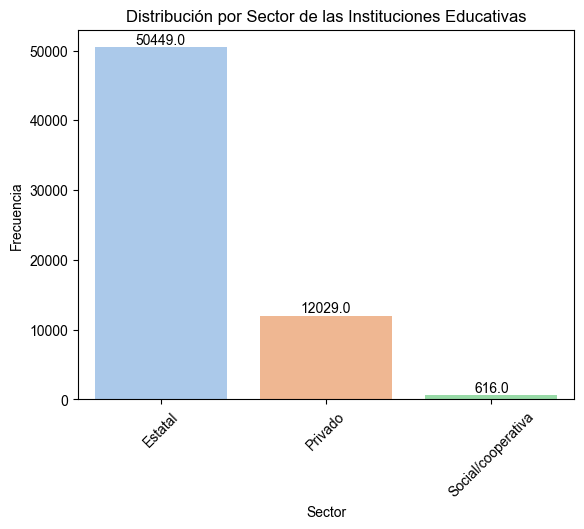

In [72]:
# Gráfico de barras
sns.countplot(data=df, x='Sector', hue='Sector', palette='pastel', legend=False)

# Rotar etiquetas del eje x
plt.xticks(rotation=45)

# Agregar anotaciones en las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Títulos y etiquetas
plt.title("Distribución por Sector de las Instituciones Educativas")
plt.xlabel("Sector")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

# HISTORIOGRAMA

- se presenta la distribución del número de instituciones educativas en diferentes provincias.
- Este análisis permite visualizar la variabilidad en la cantidad de instituciones educativas en cada jurisdicción.

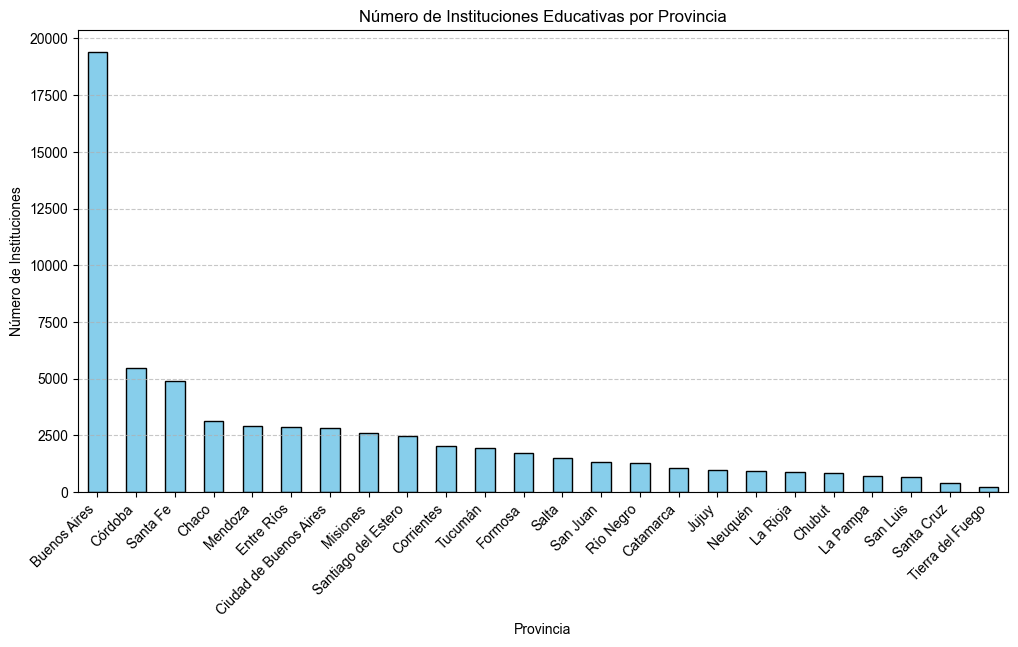

In [73]:
# Contar la frecuencia de instituciones educativas por provincia
provincia_counts = df['Jurisdicción'].value_counts()

# Graficar el historiograma de frecuencia por provincia
plt.figure(figsize=(12, 6))
provincia_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de Instituciones Educativas por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Instituciones')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# GRAFICO DE PASTEL

- En la provincia de Buenos Aires ¿encontramos más instuciones educativas en el ambito urbano o rural?

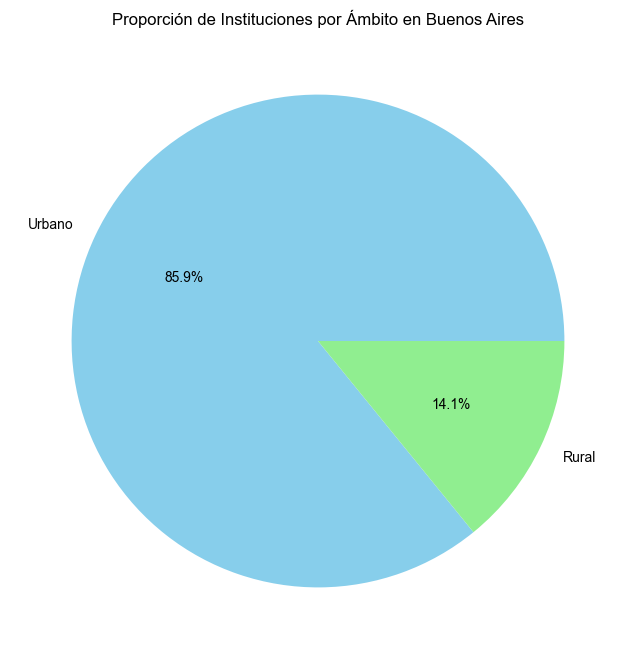

In [74]:
# Filtrar solo las instituciones de la provincia de Buenos Aires
ba_df = df[df['Jurisdicción'] == 'Buenos Aires']

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
ba_df['Ámbito'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Proporción de Instituciones por Ámbito en Buenos Aires')
plt.ylabel('')  # Eliminar la etiqueta del eje y
plt.show()

# GRAFICO DE DISPERSIÓN

- cómo se distribuyen las instituciones educativas en diferentes jurisdicciones y cómo se relaciona esta distribución con la categoría 'Ed. Común', todo ello diferenciado por sectores mediante el uso de color y forma.

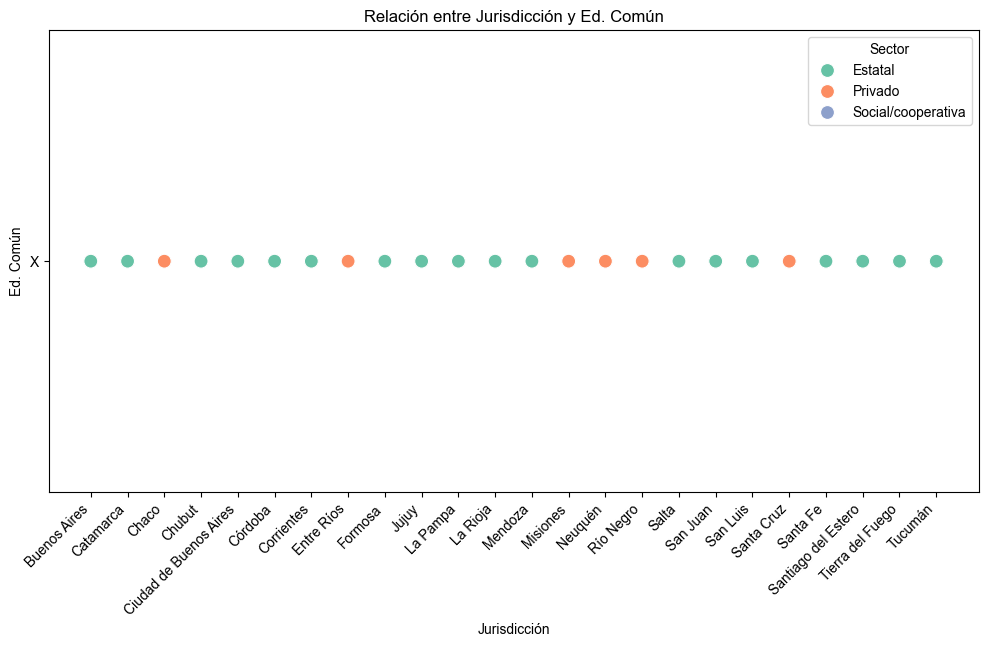

In [75]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Jurisdicción', y='Ed. Común', hue='Sector', palette='Set2', s=100)
plt.title('Relación entre Jurisdicción y Ed. Común')
plt.xlabel('Jurisdicción')
plt.ylabel('Ed. Común')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sector')
plt.show()

# Hipotesis

### Las provincias tienen más instituciones de ambito urbano y/o estatal que de ambito rural y/o privado.
Podemos dar cuenta de ello con los siguientes graficos.


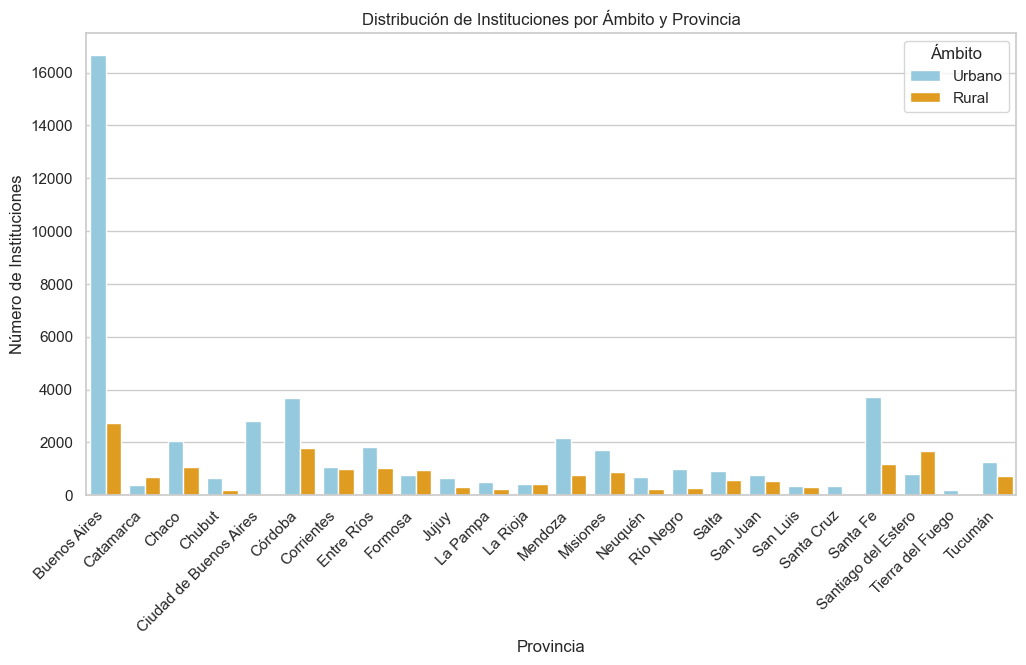

In [81]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 6))
sns.countplot(x='Jurisdicción', hue='Ámbito', data=df, palette=['skyblue', 'orange'])

# Configurar el gráfico
plt.title('Distribución de Instituciones por Ámbito y Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Instituciones')
plt.legend(title='Ámbito')

# Ajustar el formato del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

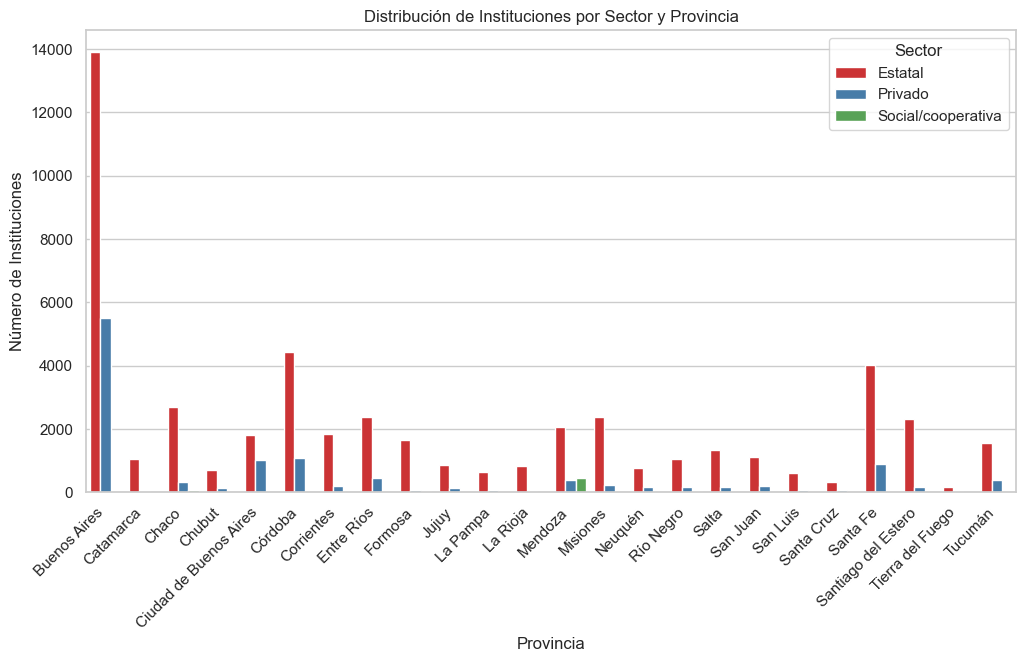

In [84]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 6))
sns.countplot(x='Jurisdicción', hue='Sector', data=df, palette='Set1')

# Configurar el gráfico
plt.title('Distribución de Instituciones por Sector y Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Instituciones')
plt.legend(title='Sector')

# Ajustar el formato del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

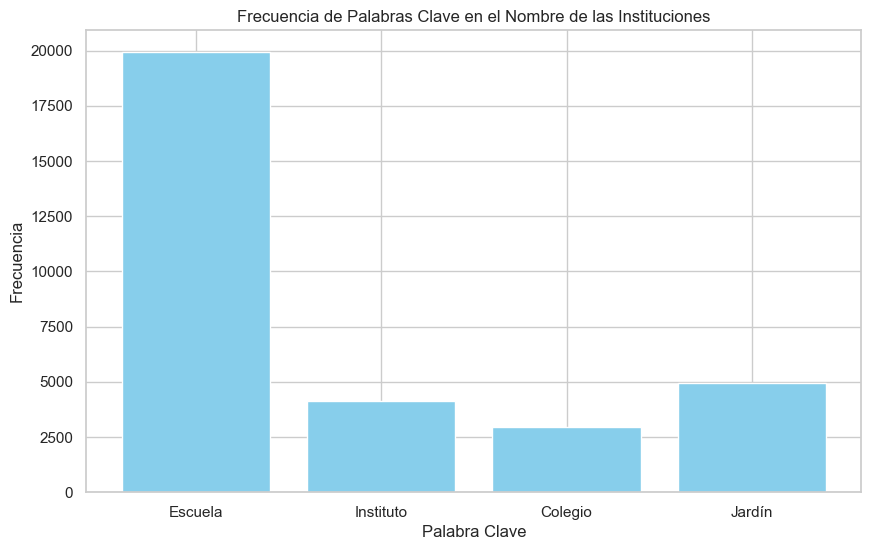

In [89]:
if 'Nombre' in df.columns:
    # Palabras clave para buscar en el nombre de la institución
    palabras_clave = ['Escuela', 'Instituto', 'Colegio', 'Jardín']

    # Inicializa un diccionario para contar la frecuencia de cada palabra clave
    frecuencia_palabras = {palabra: 0 for palabra in palabras_clave}

    # Itera sobre cada palabra clave y cuenta la frecuencia
    for palabra in palabras_clave:
        frecuencia_palabras[palabra] = df['Nombre'].str.contains(palabra, case=False).sum()

    # Convierte el diccionario a un DataFrame para facilitar la visualización
    df_frecuencia = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra Clave', 'Frecuencia'])

    # Configura el estilo del gráfico
    plt.figure(figsize=(10, 6))
    plt.bar(df_frecuencia['Palabra Clave'], df_frecuencia['Frecuencia'], color='skyblue')

    # Configura el título y las etiquetas
    plt.title('Frecuencia de Palabras Clave en el Nombre de las Instituciones')
    plt.xlabel('Palabra Clave')
    plt.ylabel('Frecuencia')

    # Muestra el gráfico
    plt.show()
else:
    print("La columna 'Nombre' no existe en el conjunto de datos.")

In [92]:
import statsmodels.api as sm

In [97]:
y = df['Código localidad']
X = df['CUE Anexo']

# Agrega una constante a la variable independiente (intercepto)
X = sm.add_constant(X)

# Crea el modelo de regresión lineal
modelo = sm.OLS(y, X)

# Ajusta el modelo
resultados = modelo.fit()

# Imprime un resumen del modelo
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:       Código localidad   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.751e+09
Date:                Mon, 13 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:32:40   Log-Likelihood:            -8.5200e+05
No. Observations:               63094   AIC:                         1.704e+06
Df Residuals:                   63092   BIC:                         1.704e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.348e+05   1059.255    221.629      0.0

# CONCLUSIONES

## Distribución de Instituciones por Ámbito y Sector:

- Existe una predominancia de instituciones urbanas en comparación con rurales.
- La mayoría de las instituciones son estatales en lugar de privadas.

## Distribución de Instituciones por Provincia:

- Buenos Aires, Córdoba y Santa Fe son las provincias con mayor cantidad de instituciones educativ Las cuales son, según el último censo, las provincias con más habitantes de Argentina.
- A mayor cantidad de habitantes mayor cantidad de Instituciones educativas por provincia.
as.